#                                HR ATTIRATION - DATASET

In [1]:
#Importing necesscary libraries

In [2]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#Loading dataset

In [4]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\Project 3 - HR Analytics-20231014T055814Z-001\Project 3 - HR Analytics\Data P3 MeriSKILL\HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Checking information of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#As we can see dtypes : 26 features are numerical, 9 features are categorical

In [8]:
unique_val = df.apply(lambda x: len(x.unique()))
unique_val

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
#checking for the nan values

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
#No null values present in the data

In [12]:
#lets check with the duplicate values

In [13]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [14]:
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",5:"Executive Level"})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [15]:
df.select_dtypes(include="O").head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Junior Level,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Junior Level,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Entry Level,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Entry Level,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Entry Level,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better


In [16]:
#since its saying false there's no duplicated values in dataset

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


In [18]:
# shall drop unnessary column which doesnt imply any change to our data

In [19]:
cols = ["Over18","EmployeeCount","EmployeeNumber","StandardHours"]

df.drop(columns=cols, inplace=True)


In [20]:
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


In [21]:
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [22]:
# Data visualization

<Axes: >

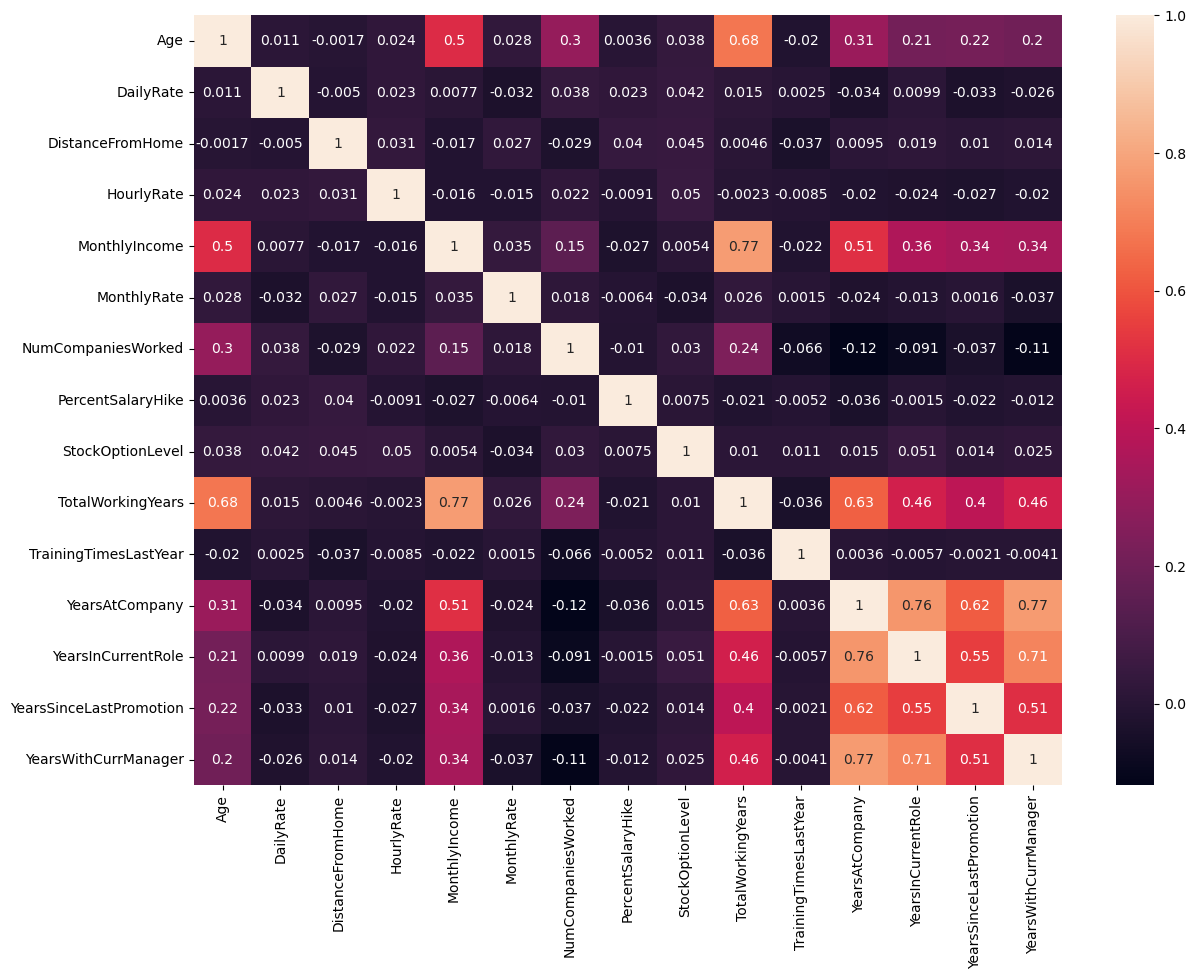

In [23]:
#Correlation matrix with numerical features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(),annot=True)

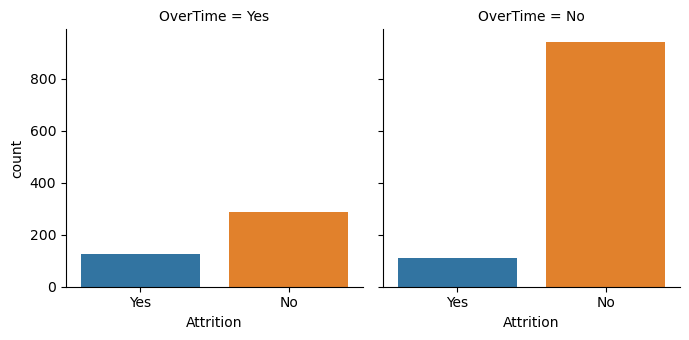

In [24]:
#Overtime vs Attrition
g = sns.catplot(x="Attrition", col="OverTime", col_wrap=2, data=df, kind="count", height=3.5, aspect=1.0)

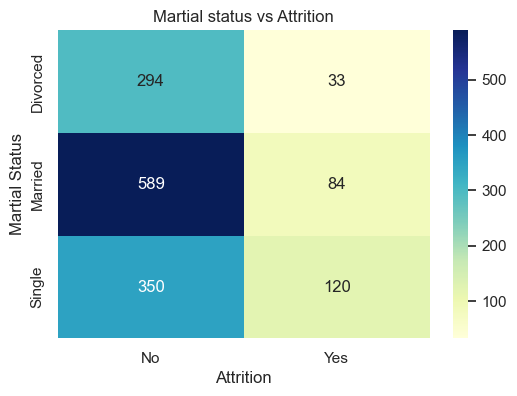

In [58]:
cross_tab = pd.crosstab(df["MaritalStatus"], df["Attrition"])
sns.set(style="whitegrid") 
plt.figure(figsize=(6, 4))  
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Attrition")
plt.ylabel("Martial Status")
plt.title("Martial status vs Attrition")
plt.show()

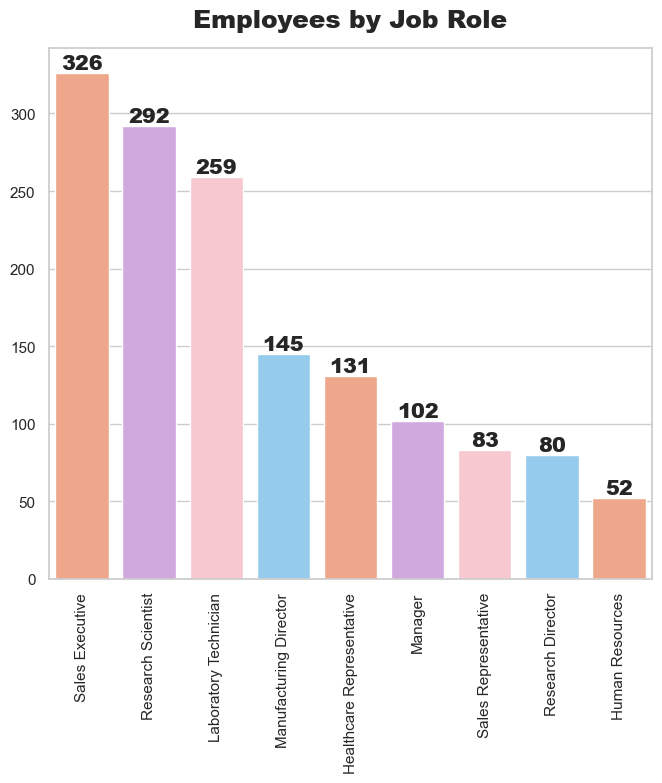

In [26]:
#Employees by job roles
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
value_1 = df["JobRole"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Job Role",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)


plt.tight_layout()
plt.show()


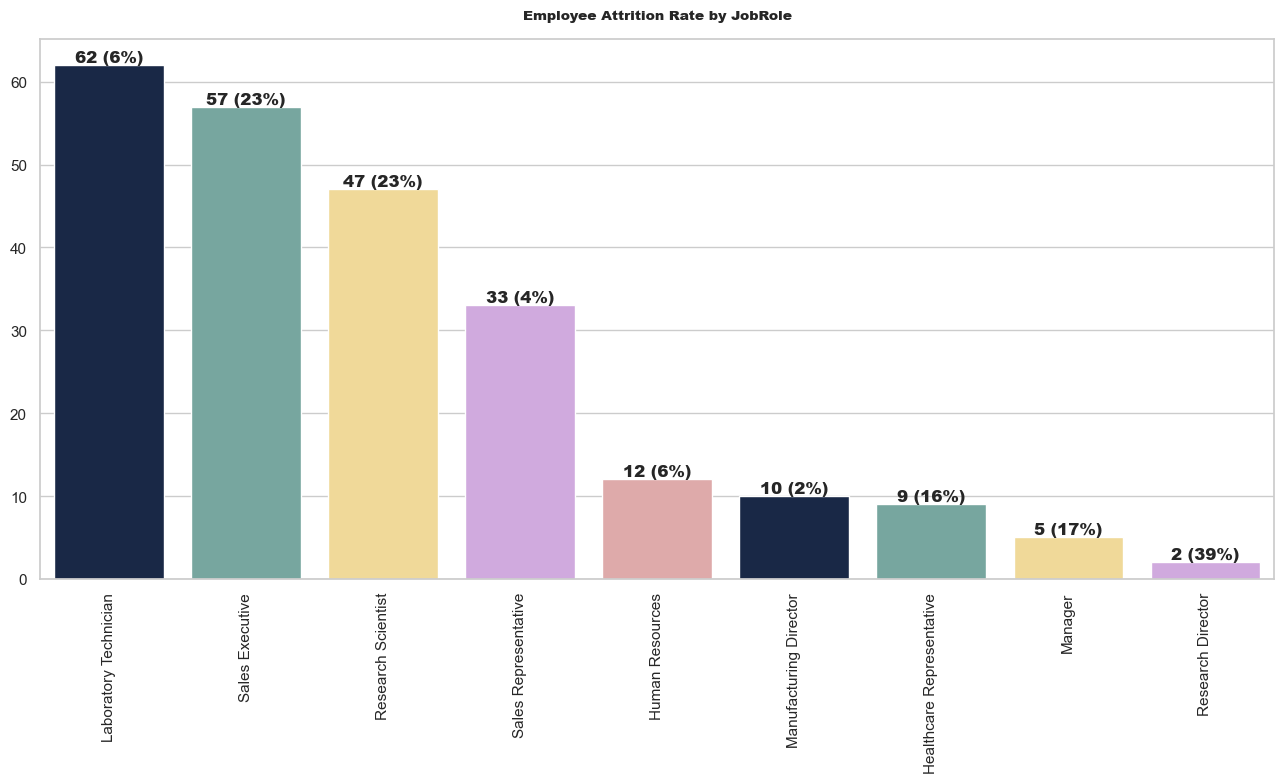

In [27]:
plt.figure(figsize=(13,8))
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=10)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=12)

plt.tight_layout()
plt.show()


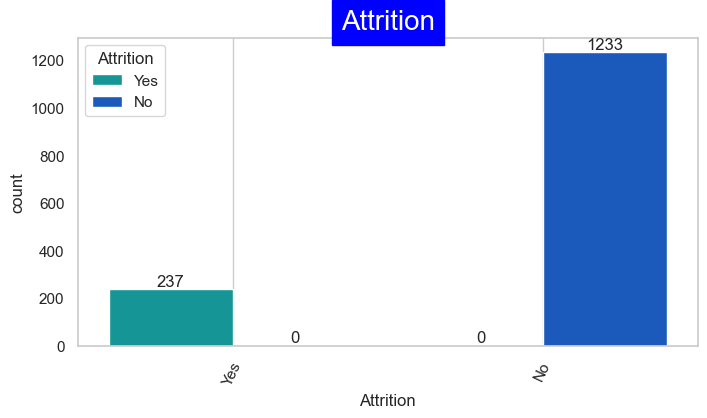

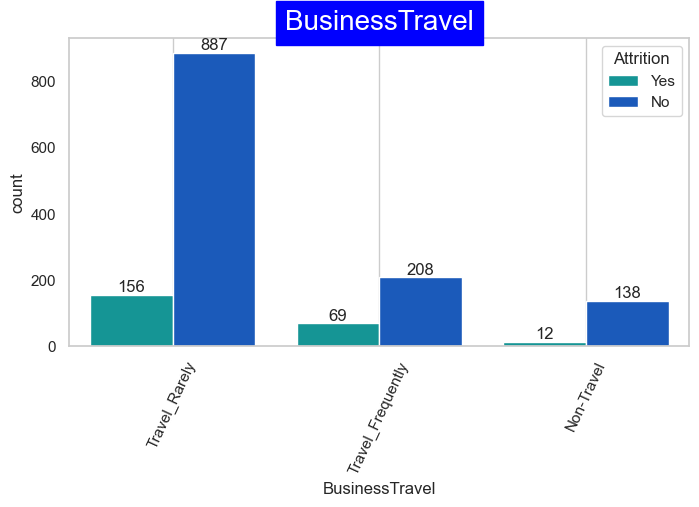

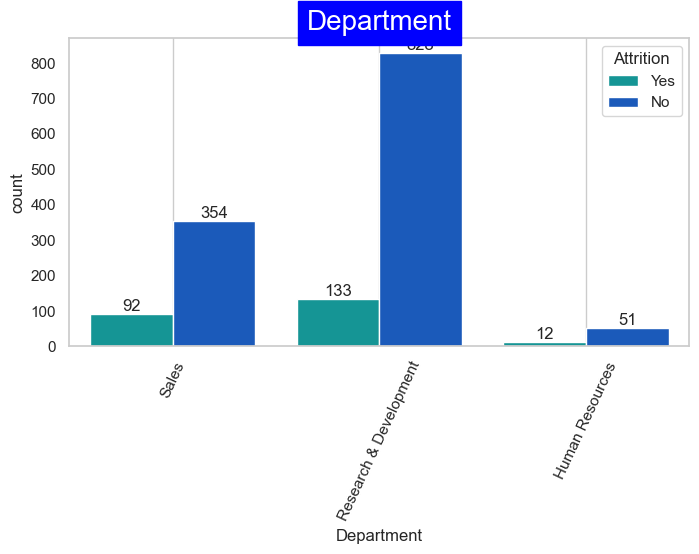

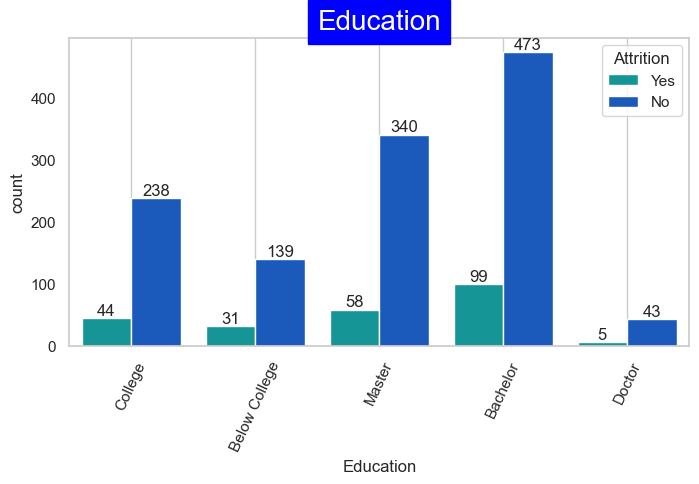

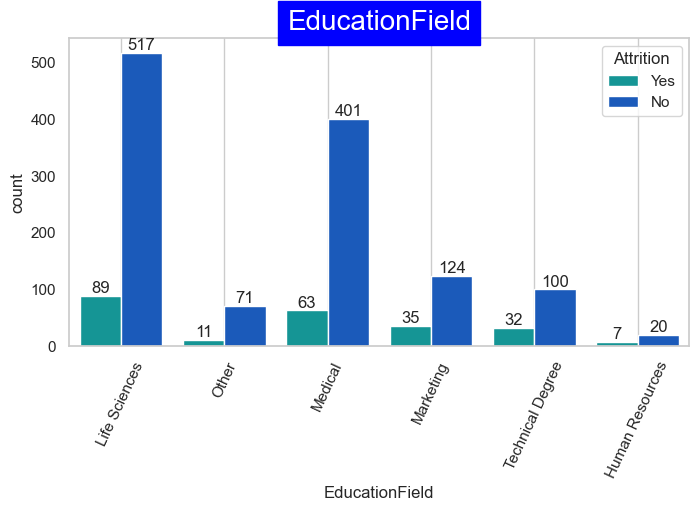

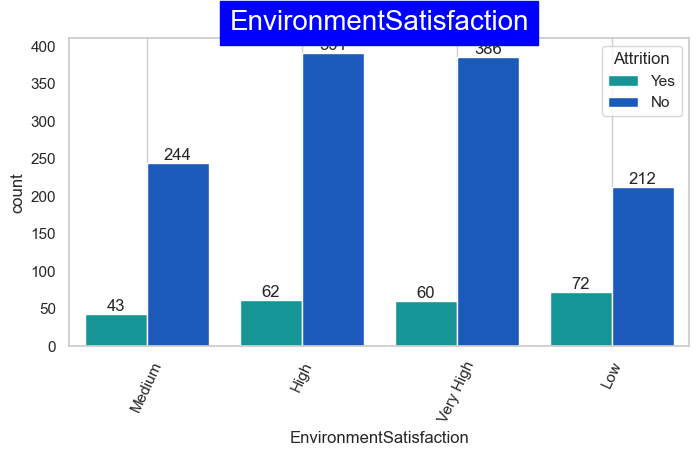

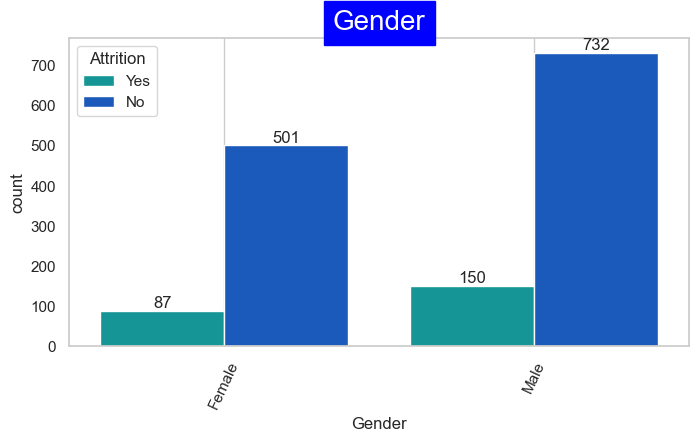

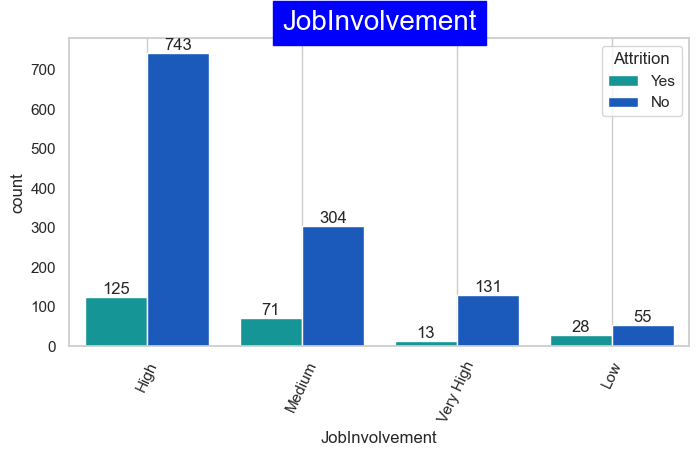

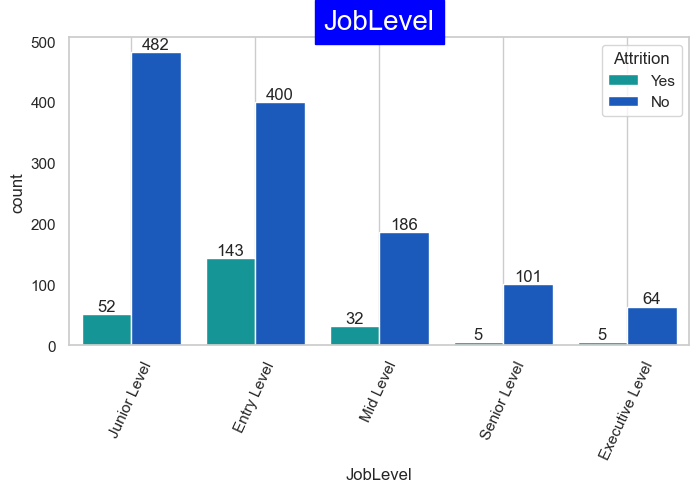

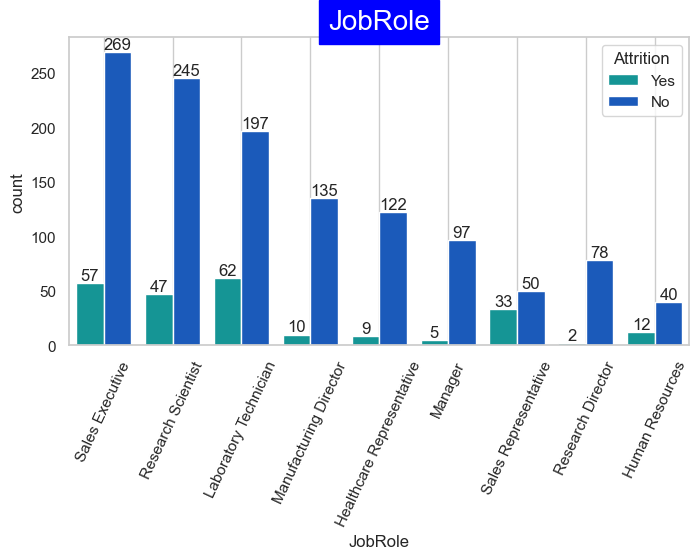

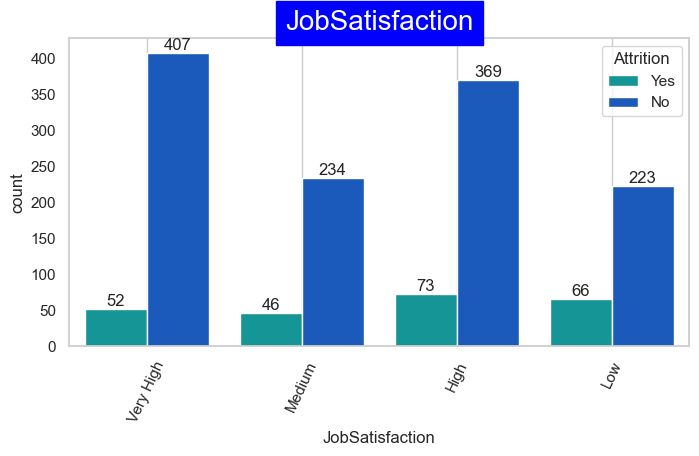

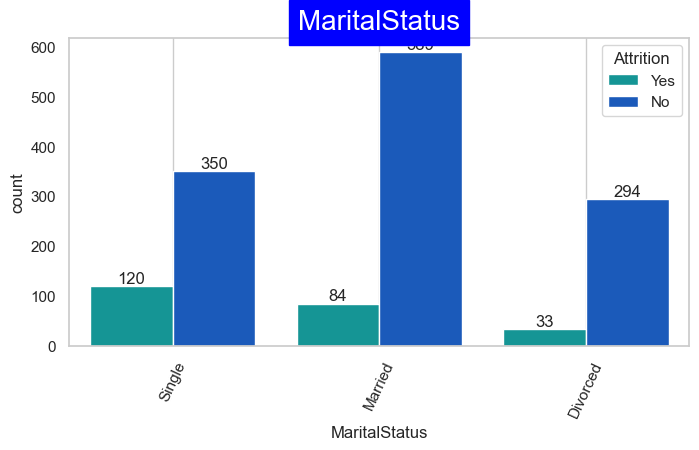

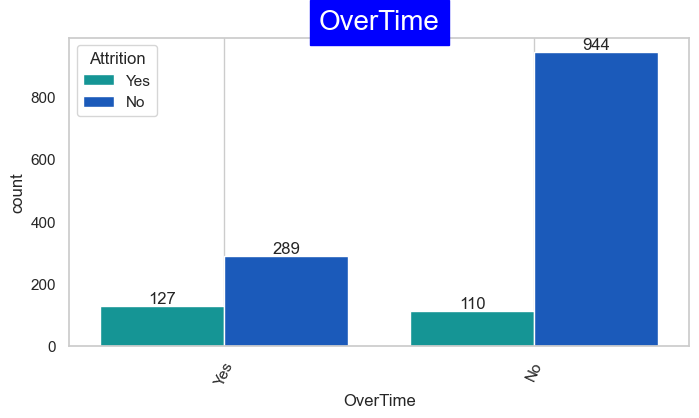

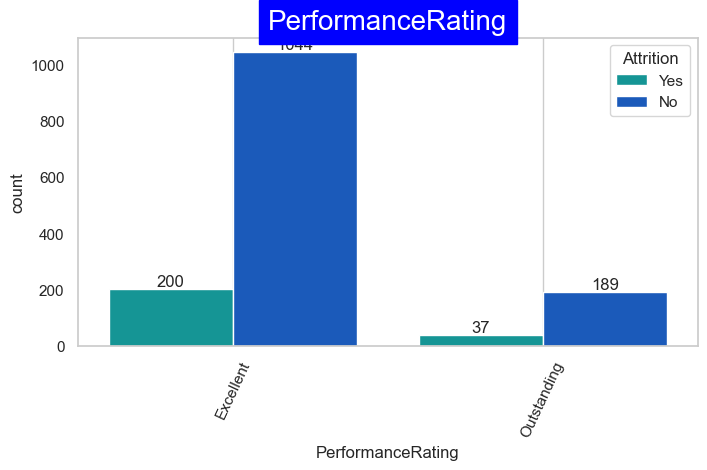

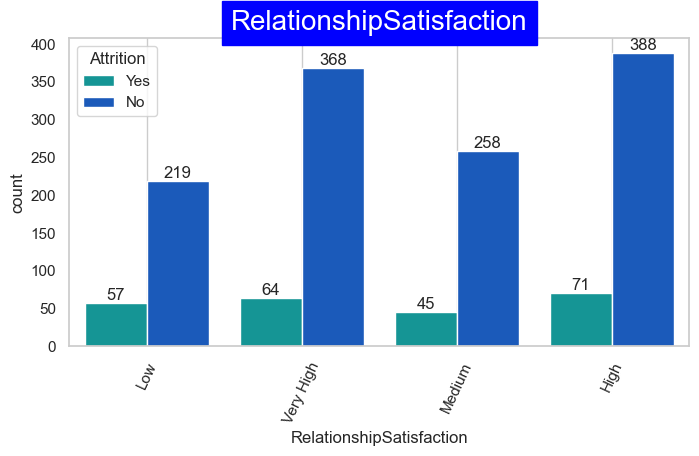

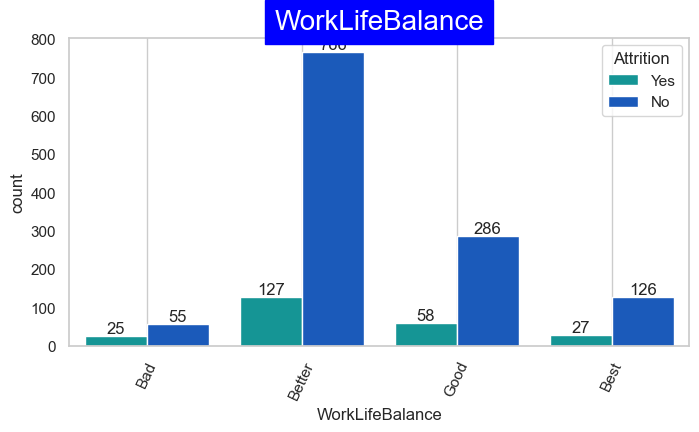

In [62]:
for column in cat : 
    plt.figure(figsize=(8,4))
    
    ax=sns.countplot(x=df[column], data=df,hue="Attrition",palette='winter_r')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='Blue',color='white',fontsize=20)
    plt.xticks(rotation=65)
    plt.xlabel(column,fontsize=12)
    plt.grid()
    plt.show()


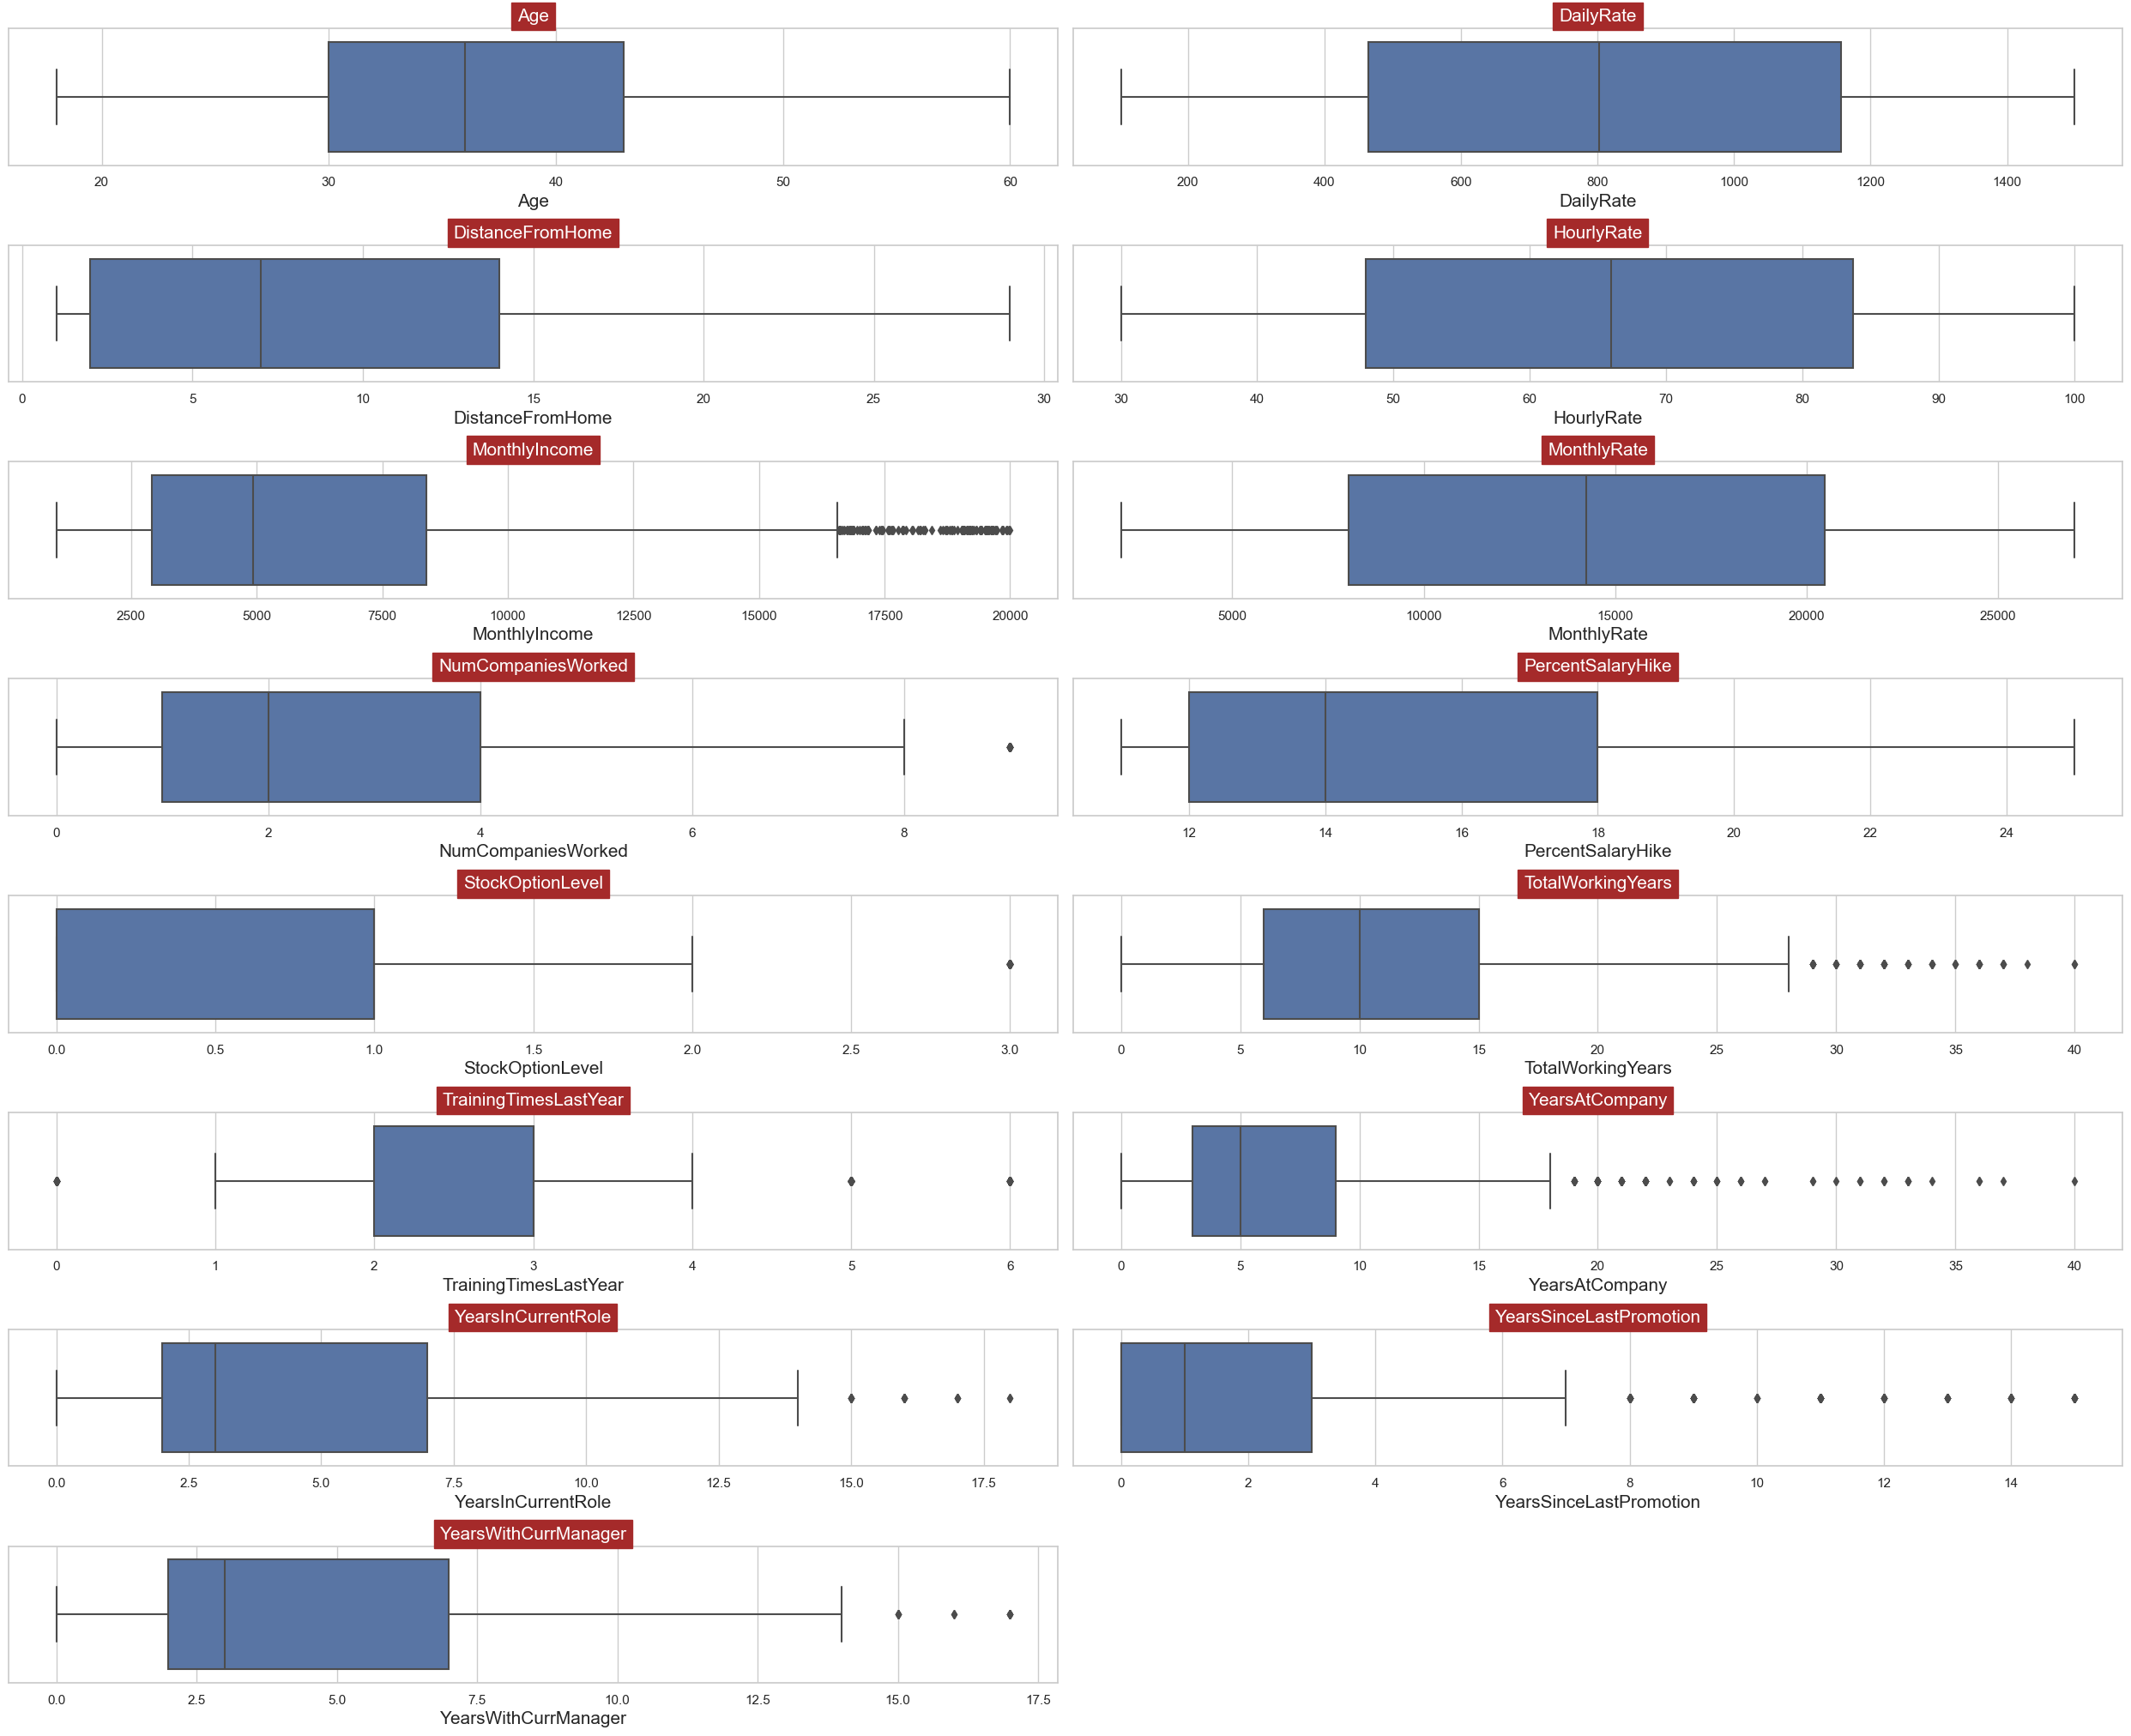

In [52]:
plt.figure(figsize = (25,30))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='brown',color='white',fontsize=15)
    plt.xlabel(i, size = 15)
plt.tight_layout()                     
plt.show()


<Axes: xlabel='Age', ylabel='OverTime'>

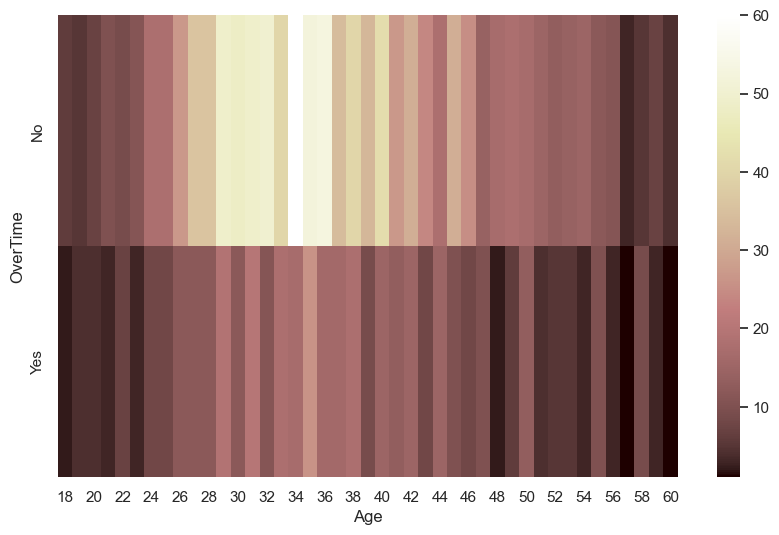

In [30]:
plt.figure(figsize = (10,6))
table1 = pd.crosstab(df['OverTime'],df['Age'])
sns.heatmap(table1, cmap='pink')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


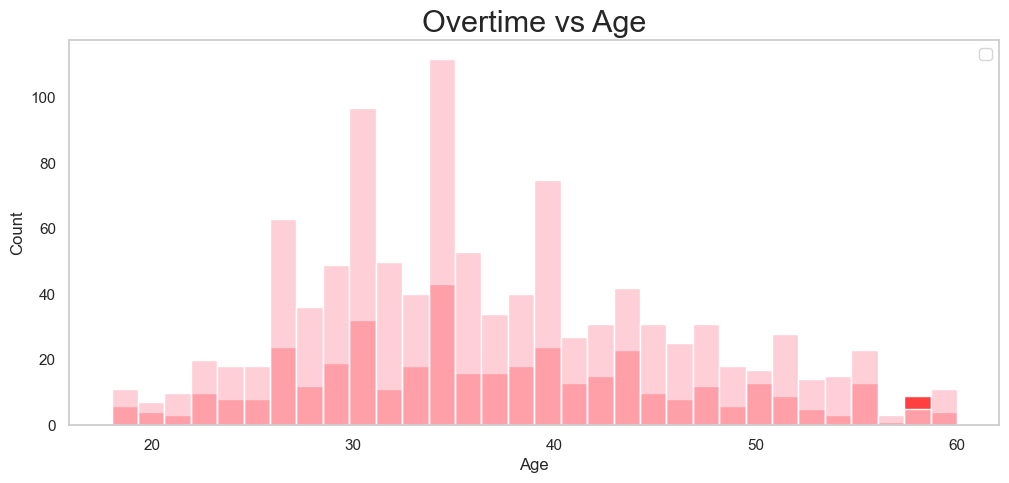

In [48]:
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(df['Age'][df['OverTime']=='Yes'],  ax=ax, color='red',bins=32)
sns.histplot(df['Age'][df['OverTime']=='No'] , ax=ax, color='pink',bins=32)
ax.set_title("Overtime vs Age",fontsize=22)
ax.legend()
ax.grid()
plt.show()

<Axes: xlabel='TotalWorkingYears', ylabel='Attrition'>

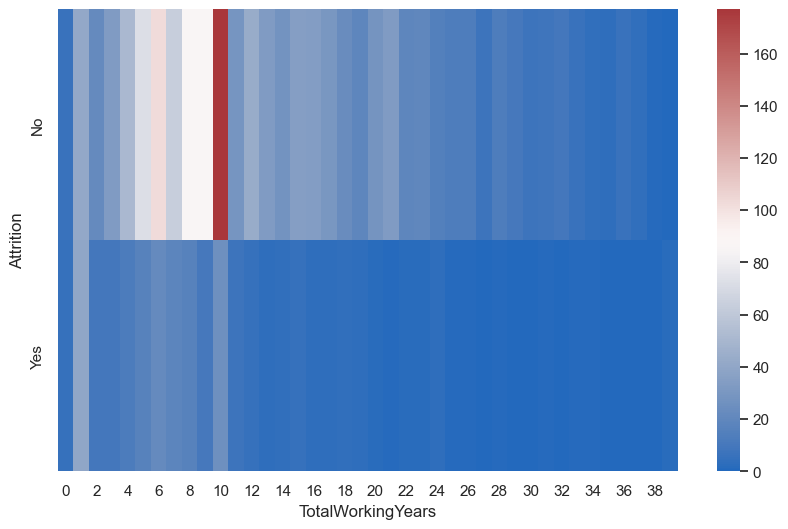

In [46]:
plt.figure(figsize = (10,6))
table1 = pd.crosstab(df['Attrition'],df['TotalWorkingYears'])
sns.heatmap(table1, cmap='vlag')

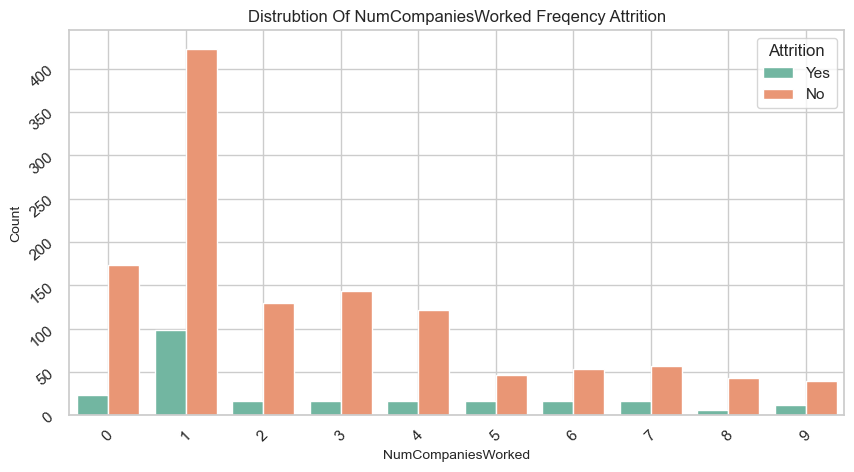

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df,palette='Set2')
plt.grid(True)
plt.title('Distrubtion Of NumCompaniesWorked Freqency Attrition',fontsize=12)
plt.xlabel('NumCompaniesWorked',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.xticks(rotation=45)
plt.yticks(rotation=40)
plt.show()